In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
gender_sub = pd.read_csv('titanic/gender_submission.csv')

In [107]:
#quick review of the data and general insight
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
#Reviewing the data types and null values, Seems like Age and Cabin number stand out with the most null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


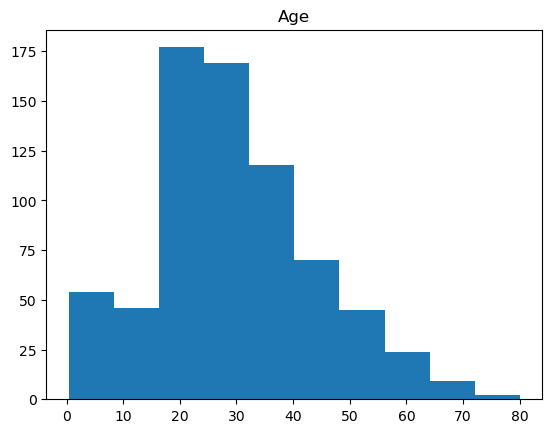

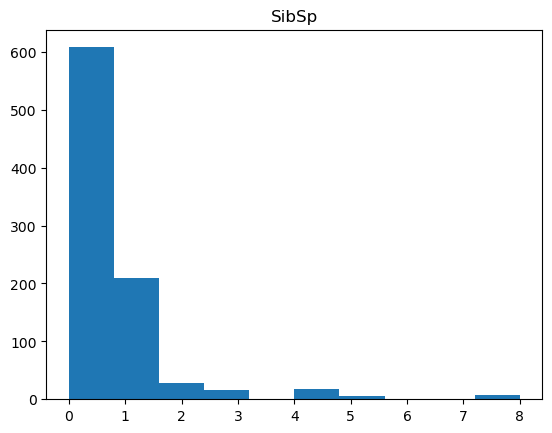

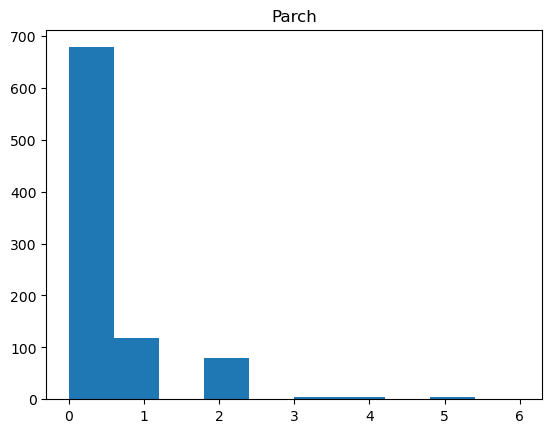

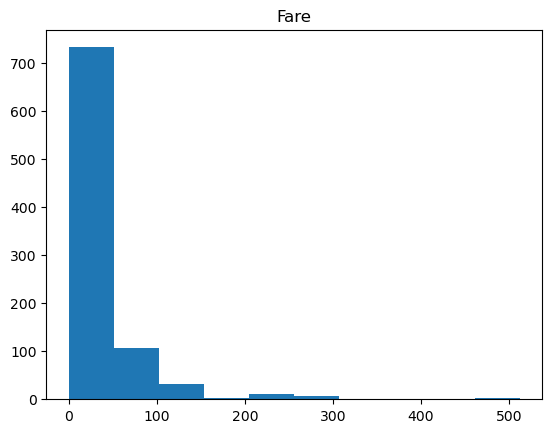

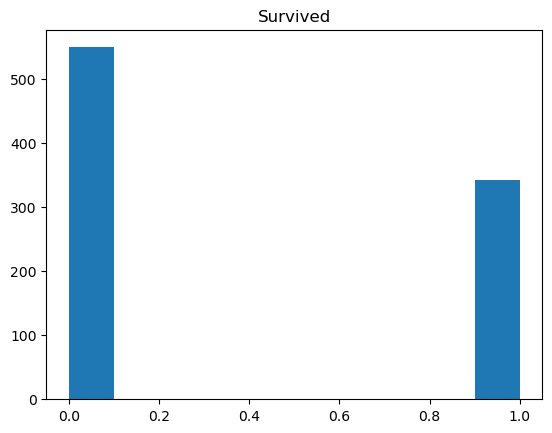

In [117]:
#numerical attributes
num_col = train[['Age','SibSp','Parch','Fare','Survived']]
for i in num_col.columns:
    plt.hist(num_col[i])
    plt.title(i)
    plt.show()

               Age     SibSp     Parch      Fare  Survived
Age       1.000000 -0.308247 -0.189119  0.096067 -0.077221
SibSp    -0.308247  1.000000  0.414838  0.159651 -0.035322
Parch    -0.189119  0.414838  1.000000  0.216225  0.081629
Fare      0.096067  0.159651  0.216225  1.000000  0.257307
Survived -0.077221 -0.035322  0.081629  0.257307  1.000000


<Axes: >

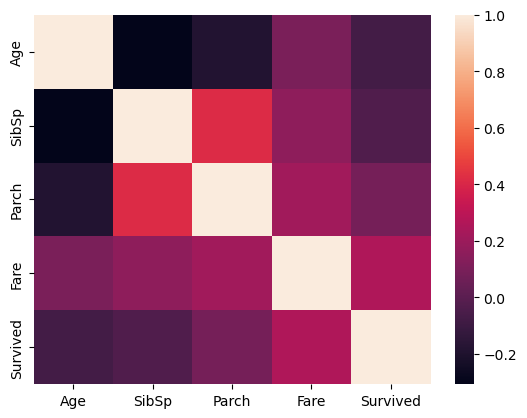

In [115]:
#Checking if there is any correlation between the data of these columns

print(num_col.corr())
sns.heatmap(num_col.corr())
#stronger correlation between SibSp and Parch

<Axes: xlabel='Age', ylabel='Count'>

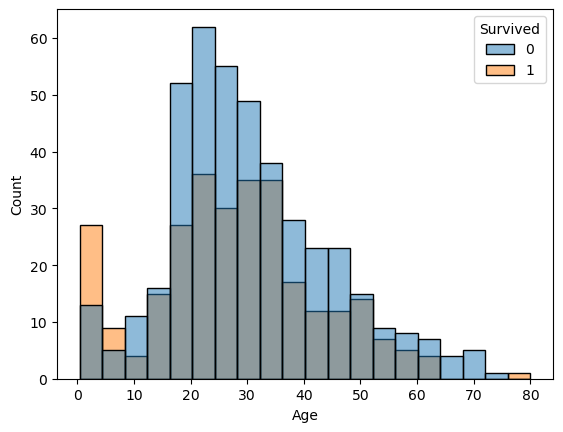

In [121]:
sns.histplot(data=train, x = "Age", hue="Survived")

<Axes: xlabel='Sex', ylabel='Count'>

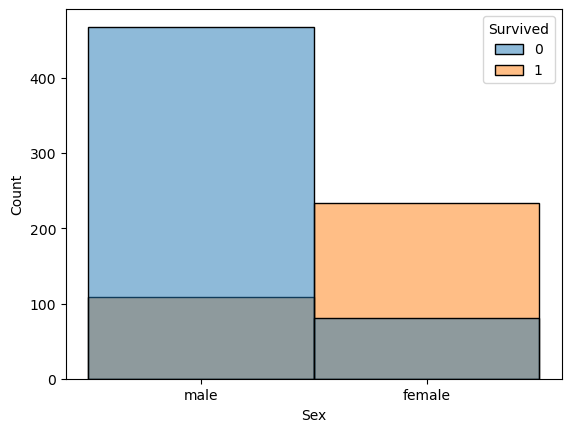

In [123]:
sns.histplot(data=train, x = "Sex", hue="Survived")
#High percentage of females survived. 

In [125]:
female = train.loc[train.Sex == "female"].Survived
female_survived = sum(female)/len(female)

print('The chances of female survivor are: ', female_survived)

The chances of female survivor are:  0.7420382165605095


In [127]:
male = train.loc[train.Sex == 'male'].Survived
male_survived = sum(male)/len(male)

print('The chances of a male survivor are: ', male_survived)

The chances of a male survivor are:  0.18890814558058924


In [129]:
y = train['Survived']
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [131]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Age']
print(features)

['Pclass', 'Sex', 'SibSp', 'Parch', 'Age']


In [133]:
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])
print(X)
print(X_test)

     Pclass  SibSp  Parch   Age  Sex_female  Sex_male
0         3      1      0  22.0       False      True
1         1      1      0  38.0        True     False
2         3      0      0  26.0        True     False
3         1      1      0  35.0        True     False
4         3      0      0  35.0       False      True
..      ...    ...    ...   ...         ...       ...
886       2      0      0  27.0       False      True
887       1      0      0  19.0        True     False
888       3      1      2   NaN        True     False
889       1      0      0  26.0       False      True
890       3      0      0  32.0       False      True

[891 rows x 6 columns]
     Pclass  SibSp  Parch   Age  Sex_female  Sex_male
0         3      0      0  34.5       False      True
1         3      1      0  47.0        True     False
2         2      0      0  62.0       False      True
3         3      0      0  27.0       False      True
4         3      1      1  22.0        True     False
..  

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
model.fit(X,y)
predictions =  model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
print(output)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [137]:
acc_score = round(model.score(X,y) * 100, 2)
print('The random forest model accuracy score is: ', acc_score, '%')

The random forest model accuracy score is:  84.06 %


In [139]:
pred_features = ['Pclass', 'SibSp', 'Parch', 'Age', 'Sex_female', 'Sex_male']
userinput = np.array([3, 1, 0, 22, True, False])

curr_prediction = pd.DataFrame([userinput], columns = pred_features)

print(curr_prediction)

   Pclass  SibSp  Parch  Age  Sex_female  Sex_male
0       3      1      0   22           1         0


In [141]:
print(model.predict(curr_prediction))

[1]


In [143]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

print(widgets.__version__)


8.1.2


In [145]:
class_widget = widgets.IntSlider(
    value=1,
    min=1,
    max=3,
    step=1,
    description='Ticket Class:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
sibsp_widget = widgets.IntSlider(
    value=0,
    min=0,
    max=8,
    step=1,
    description='Siblings/Spouse',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
parch_widget = widgets.IntSlider(
    value=0,
    min=0,
    max=6,
    step=1,
    description='Parent/Child',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
sex_widget = widgets.ToggleButtons(
    options=['Male', 'Female'],
    description='Male or Female?',
    disabled=False,
    button_style='info', 
    tooltips=['Yes', 'No'],
)
age_widget = widgets.IntSlider(
    value=1,
    min=1,
    max=80,
    step=1,
    description='Age:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
button_predict = widgets.Button( description='Predict' )
button_output = widgets.Label('Lets get some predictions')
widget_out = widgets.Output()

# there are 2 inputs for selecting a sex.
def sex_toggle(m):
    if m == 'Male':
        return False
    else:
        return True

#For better readability printing 0 as 'Not survived' 1 as survived
def survive(s):
    if s == 0:
        return 'Did not survive'
    else:
        return 'Survived'
    

def on_click_predict(b):
    curr_sel = np.array([class_widget.value, 
                             sibsp_widget.value, 
                             parch_widget.value, 
                             age_widget.value,
                             sex_toggle(sex_widget.value), 
                             not sex_toggle(sex_widget.value)
                             ])
    curr_pred = pd.DataFrame([curr_sel], columns = ['Pclass', 'SibSp', 'Parch', 'Age', 'Sex_female', 'Sex_male'])
    with widget_out : print(survive(model.predict(curr_pred)))
    
    #button_output.value='Prediction = '+ str(predicition[0])

button_predict.on_click(on_click_predict)

vb=widgets.VBox([class_widget, sibsp_widget, parch_widget, sex_widget, age_widget, button_predict])
print('\033[1m' + 'Choose selections, then click on \'Predict\' to retrieve your results.' + '\033[0m')
display(vb, widget_out)

Choose selections, then click on 'Predict' to retrieve your results.


Output()